In [2]:
import glob
import os
import numpy as np
import pandas as pd
import random
import itertools
import matplotlib.pyplot as plt

from healthcareai_toolkit.clients import MedImageParseClient
from healthcareai_toolkit import settings

In [5]:
N = 1

data_dir = settings.DATA_ROOT

files = list(glob.glob(data_dir + "segmentation-examples//*.*", recursive=True))
files = [f for f in files if os.path.isfile(f)]
files_dict = {
    k: list(v) for k, v in itertools.groupby(files, lambda x: x.split(".")[-1])
}

print(files_dict.keys())
files = sum([files_dict[k][:N] for k in ["jpg", "dcm", "png", "jpeg"]], [])

files

dict_keys(['jpg', 'png', 'dcm', 'gz', 'jpeg'])


['/home/azureuser/data/healthcare-ai/segmentation-examples/T0011.jpg',
 '/home/azureuser/data/healthcare-ai/segmentation-examples/CT_lung_nodule.dcm',
 '/home/azureuser/data/healthcare-ai/segmentation-examples/covid_1585.png',
 '/home/azureuser/data/healthcare-ai/segmentation-examples/144DME_as_F.jpeg']

In [6]:
client = MedImageParseClient(settings.MIP_MODEL_ENDPOINT)

Using ml_client base_url 1: https://management.azure.com
Using ml_client base_url 2: https://management.azure.com


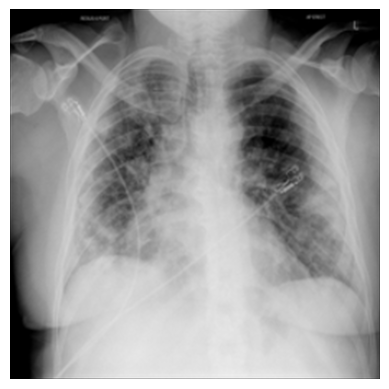

In [ ]:
image_file = [f for f in files if "covid" in f][0]
image = client.read_and_normalize_image(image_file)

plt.imshow(image, cmap="bone")
plt.axis("off")
plt.show()

In [14]:
result = client.submit(
    image_list=[image_file],
    prompts=["lung"],
)

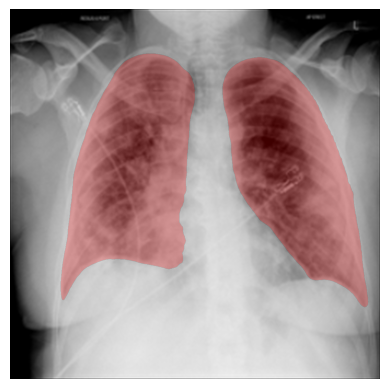

In [17]:
def show_image_with_mask(image: np.ndarray, mask: np.ndarray, alpha: float = 0.5):
    if image.shape[:2] != mask.shape:
        raise ValueError(
            "The dimensions of the mask do not match the dimensions of the image."
        )

    overlay = np.zeros((*mask.shape[:2], 4), dtype=np.uint8)
    overlay[mask.astype(bool)] = [255, 0, 0, int(255 * alpha)]
    plt.imshow(image)
    plt.imshow(overlay, alpha=alpha)
    plt.axis("off")
    plt.show()


masks = result[0]["image_features"]
show_image_with_mask(image, masks[0])